<a href="https://colab.research.google.com/github/syunar/22-01_Laptops-Prices-Prediction-Analysis/blob/main/22_01_02_EDA_DataPrepocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from google.colab.data_table import DataTable
DataTable.max_columns = 50

In [ ]:
def missing(df):
    """
    this function use for create dataframe which tell you sum of missing values
    and percent of missing values in each columns
    """
    total = df.isna().sum().sort_values(ascending=False)
    percent = df.isna().mean().sort_values(ascending=False)
    missing_values = pd.concat([total, percent], axis=1, keys=['total', 'percent'])
    return missing_values[missing_values['percent'] > 0]

In [ ]:
def compare(col,n=5):
    """
    this function use for compare the data after cleaning
    """
    return df[col].to_frame().join(df_raw[col].to_frame(),lsuffix='_clean', rsuffix='_raw').sample(n)

## Read Data

In [ ]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/syunar/notebookspec/main/nbprice.csv', index_col=0)
df_raw.head(3)

,names,prices,urls,Brand,Model,Model Year,CPU,GPU,Panel Type,Size,...,Body Material,Body Color,Weight,Battery Type,Keyboard Type,Keyboard Backlit,Numpad,Other Detail,Warranty,Insurance
0,Acer Predator Helios 300 PH317-56-75RR,"79,900",https://notebookspec.com/notebook/12133-acer-p...,Acer,Acer Predator Helios 300 PH317-56-75RR,Q3 / 2022,"Intel Core i7-12700H (3.50 GHz, 24 MB L3 Cache...",NVIDIA GeForce RTX 3060 (6GB GDDR6),IPS,17.3 นิ้ว,...,Aluminium + Plastic,Abyssal Black,2.99 kg,"4-Cell Li-ion, 90Whr",RGB Chiclet Keyboard,มี,มี,NaN,3Y (Parts & Labor & Onsite),ไม่มี
1,Acer Predator Helios 300 PH317-56-71ZW,"66,900",https://notebookspec.com/notebook/12132-acer-p...,Acer,Acer Predator Helios 300 PH317-56-71ZW,Q3 / 2022,"Intel Core i7-12700H (3.50 GHz, 24 MB L3 Cache...",NVIDIA GeForce RTX 3060 (6GB GDDR6),IPS,17.3 นิ้ว,...,Aluminium + Plastic,Abyssal Black,2.99 kg,"4-Cell Li-ion, 90Whr",RGB Chiclet Keyboard,มี,มี,NaN,3Y (Parts & Labor & Onsite),ไม่มี
2,Acer Nitro 5 AN515-58-705T,"41,990",https://notebookspec.com/notebook/12131-acer-n...,Acer,Acer Nitro 5 AN515-58-705T,Q3 / 2022,"Intel Core i7-12700H (3.50 GHz, 24 MB L3 Cache...",NVIDIA GeForce RTX 3050 Ti (4GB GDDR6),IPS,15.6 นิ้ว,...,Plastic,Obsidian Black,2.5 kg,"4-Cell Li-ion, 57.5 Wh",RGB Chiclet Keyboard,มี,มี,NaN,3Y (Parts & Labor & Onsite),ไม่มี


In [ ]:
# quick overview info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 0 to 2351
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   names              2352 non-null   object
 1   prices             2352 non-null   object
 2   urls               2352 non-null   object
 3   Brand              2352 non-null   object
 4   Model              2352 non-null   object
 5   Model Year         2352 non-null   object
 6   CPU                2352 non-null   object
 7   GPU                2352 non-null   object
 8   Panel Type         2343 non-null   object
 9   Size               2352 non-null   object
 10  Resolution         2352 non-null   object
 11  Refresh Rate       2352 non-null   object
 12  Touch Screen       2352 non-null   object
 13  Memory Size        2352 non-null   object
 14  Memory Slot        2352 non-null   object
 15  Hard Disk Drive    2352 non-null   object
 16  Solid State Drive  2352 non-null   object


## Cleaning column names

In [ ]:
## clean column names
df_raw.columns = df_raw.columns.str.strip().str.lower()\
                .str.replace(" ","_")\
                .str.replace("-","_")\
                .str.replace("\/","_")\
                .str.replace(".","")
print(f'Number of columns: {len(df_raw.columns)}')
df_raw.columns

Number of columns: 41


Index(['names', 'prices', 'urls', 'brand', 'model', 'model_year', 'cpu', 'gpu',
       'panel_type', 'size', 'resolution', 'refresh_rate', 'touch_screen',
       'memory_size', 'memory_slot', 'hard_disk_drive', 'solid_state_drive',
       'm2_slot', 'usb_ports', 'unnamed:_20', 'hdmi', 'displayport',
       'd_sub_vga', 'thunderbolt', 'wireless_lan', 'ethernet_lan', 'bluetooth',
       'os_bundle', 'web_camera', 'optical_drive', 'fingerprint',
       'body_material', 'body_color', 'weight', 'battery_type',
       'keyboard_type', 'keyboard_backlit', 'numpad', 'other_detail',
       'warranty', 'insurance'],
      dtype='object')

Now everything looking good but I found out unexpect column name called 'unnamed:_20' so let's find out

In [ ]:
df_raw['unnamed:_20'].value_counts()

1x USB 3.2 Type C    1026
1x USB 3.1 Type C     533
2x USB 3.2 Type C     308
2x USB 3.2 Type A     136
2x USB 3.1 Type C      56
2x USB 3.1 Type A      49
1x USB 3.0 Type C      31
1x USB 3.2 Type A      30
1x USB 3.1 Type A      16
3x USB 3.2 Type A      12
1x USB 3.0             10
3x USB 3.2 Type C       9
3x USB 3.1 Type C       1
Name: unnamed:_20, dtype: int64

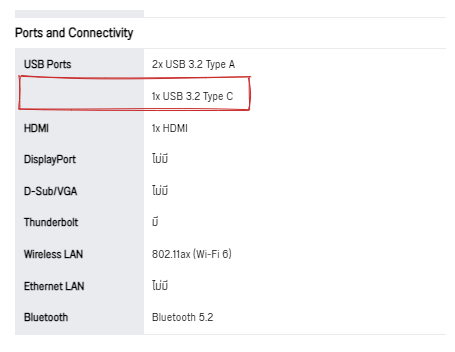

After looking at the source of this data web scraping found that some laptops have USB ports more than 1 type and the second and third types are shown on separate cells which do not have titles so this is the reason why column 'unnamed:_20' came from

Let's define the name to 'usb_ports2' for now and will do feature engineering later

In [ ]:
# change column name from unnamed:_20 to usb_ports2
df_raw.columns = df_raw.columns.str.replace('unnamed:_20','usb_ports2')

print(f'Number of columns: {len(df_raw.columns)}')
df_raw.columns

Number of columns: 41


Index(['names', 'prices', 'urls', 'brand', 'model', 'model_year', 'cpu', 'gpu',
       'panel_type', 'size', 'resolution', 'refresh_rate', 'touch_screen',
       'memory_size', 'memory_slot', 'hard_disk_drive', 'solid_state_drive',
       'm2_slot', 'usb_ports', 'usb_ports2', 'hdmi', 'displayport',
       'd_sub_vga', 'thunderbolt', 'wireless_lan', 'ethernet_lan', 'bluetooth',
       'os_bundle', 'web_camera', 'optical_drive', 'fingerprint',
       'body_material', 'body_color', 'weight', 'battery_type',
       'keyboard_type', 'keyboard_backlit', 'numpad', 'other_detail',
       'warranty', 'insurance'],
      dtype='object')

## Dataset
- names: name of laptops
    - type: category
    - segment: identify
- prices: price of laptops
    - type: numeric [Thai baht]
    - segment: target/label
- urls: urls for each laptops
    - just use for acquied data
    - didn't use
- brand: brand like ASUS, ACER, HUAWEI, etc
    - type: category
    - segment: brand
- model: model name
    - same with column names
    - will drop this column
- model_year: quarter and year since product launch
    - seperate to column quarter and year
    - type: int or category or datetime
    - segment: time
- cpu
    - type: category, ordered category
    - segment: spec
- gpu
    - type: category, ordered category
    - segment: spec
- panel_type
    - type: category
    - segment: spec
- size
    - type: numeric [inch]
    - segment: spec
- resolution
    - type: category, ordered category
    - segment: spec
- refresh_rate
    - type: numeric [Hz]
    - segment: spec
- touch_screen
    - type: category [y/n]
    - segment: spec
- memory_size
    - type: category
    - segment: spec
- memory_slot
    - type: numeric [#slots]
    - segment: spec
- hard_disk_drive
    - mostly now a day laptop didn't have HDD
    - maybe drop
    - type: ordered category
    - segment: spec
- solid_state_drive
    - type: ordered category
    - segment: spec
- m2_slot
    - seperate to m2_PCIe, m2_Combo, m2_SATA
    - type: numeric [#slots]
    - segment: spec
- usb_ports/usb_ports2
    - seperate to type A, type C
    - type: numeric [#slots]
    - segment: spec
- hdmi
    - type: numeric [#slots]
    - segment: spec
- displayport
    - type: category [y/n]
    - segment: spec
- d_sub_vga
    - type: category [y/n]
    - segment: spec
- thunnderbolt
    - type: category [y/n]
    - segment: spec
- wireless_lan
    - mostly have wifi(not represent much)
    - will drop
- ethernet_lan
    - type: category [y/n]
    - segment: spec
- bluetooth
    - type: ordered category
    - segment: spec
- os_bundle
    - type: category
    - segment: spec
- web_camera
    - type: ordered category
    - segment: spec
- optical_drive
    - type: category [y/n]
    - segment: spec
- fingerprint
    - type: category [y/n]
    - segment: spec
- body_matertial
    - type: category [y/n]
    - segment: spec
- body_color
    - have too much different type of infomation
    - will drop
- weight
    - type: numeric [kg]
    - segment: spec
- battery_type
    - have too much different type of infomation
    - will drop
- keyboard_type
    - have too much different type of infomation
    - will drop
- keyboard_backlit
    - type: category [y/n]
    - segment: spec
- numpad
    - type: category [y/n]
    - segment: spec
- other_detail: extra product that will give you for free after buy laptops
    - type: category [y/n]
    - segment: spec
- warranty
    - type: numeric [#year]
    - segment: spec
- insurance
    - mostly dont have (not represent much)
    - will drop

## Handling Missing Data

In [ ]:
df = df_raw

In [ ]:
## standardize missing values
df = df.replace(['NO DATA','N/A', 'null', 'Empty', '?', 'NaN', '', 'nan'],np.nan)

df = df.replace(['ไม่มี','ไม่','ไม่รองรับ'],'none')
df = df.replace(['มี','รองรับ'],'have')

## check missing values
missing(df)

,total,percent
other_detail,1503,0.639031
usb_ports2,135,0.057398
m2_slot,22,0.009354
panel_type,9,0.003827
warranty,6,0.002551
battery_type,5,0.002126
numpad,4,0.001701
web_camera,3,0.001276
keyboard_backlit,1,0.000425


### Clean missing value on other_detail column

In [ ]:
# quick look to columns which have percent of missing values >= 0.15
df['other_detail'].sample(10)

2226                                     NaN
2108                                     NaN
1275                                     NaN
747                             Office Trial
1572            Office Home and Student 2019
1069    Microsoft Office Home & Student 2019
802                                      NaN
1998                                     NaN
424                                      NaN
782       Microsoft Office Home&Student 2019
Name: other_detail, dtype: object

Take a look at column other_detail, it looks like the column that shows some products that you can get for free if you purchase the laptops, so most of the null values in this column represent there is no free gift product

In [ ]:
# fill na with 'none'
df['other_detail'].fillna('none', inplace=True)

df['other_detail'].isna().sum()

0

In [ ]:
missing(df)

,total,percent
usb_ports2,135,0.057398
m2_slot,22,0.009354
panel_type,9,0.003827
warranty,6,0.002551
battery_type,5,0.002126
numpad,4,0.001701
web_camera,3,0.001276
keyboard_backlit,1,0.000425


In [ ]:
# quick look to columns which have percent of missing values > 0 and < 0.15
df[missing(df).index].sample(7)

,usb_ports2,m2_slot,panel_type,warranty,battery_type,numpad,web_camera,keyboard_backlit
2084,1x USB 3.1 Type C,1 x M.2 PCIe,IPS,3 Year Onsite Service,4-cell Li-ion,have,HD Camera,have
1621,2x USB 3.2 Type A,1 x M.2 PCIe,IPS,2 Y. Carry-in Regional,2-Cell Li-ion,none,0.3 Megapixels,none
53,2x USB 3.2 Type C,1 x M.2 PCIe,IPS,2Y (1 year Global+ 1 Year Thailand),"4-Cell, 82Whr",have,HD camera with IR function to support Windows ...,have
893,1x USB 3.2 Type C,1 x M.2 PCIe,IPS,3Y Onsite + 1Y Perfect,"4-Cell Li-ion, 90Whr",none,720p HD camera,have
1040,1x USB 3.2 Type C,1 x M.2 PCIe,IPS,2 Year Onsite Service,"3-Cell Li-Polymer, 51Wh",none,HD camera,have
330,2x USB 3.2 Type A,1 x M.2 PCIe,IPS,2 Y. Carry-in Regional,"2-Cell Li-ion, 36.7 Wh",have,Acer webcam 640 x 480,none
81,1x USB 3.2 Type C,2 x M.2 PCIe,IPS,2Y (1 year Global+ 1 Year Thailand),"4-Cell Li-ion, 90Wh",have,HD Camera,have


### Clean missing value on usb_ports2 column

In [ ]:
df[['usb_ports', 'usb_ports2']].sample(7)

,usb_ports,usb_ports2
1342,2x USB 2.0,1x USB 3.2 Type C
2188,2x USB 3.1 Type A,1x USB 3.1 Type C
340,2x USB 3.2 Type A,2x USB 3.2 Type C
1518,1x USB 2.0,1x USB 3.2 Type C
962,3x USB 3.2 Type A,1x USB 3.2 Type C
568,2x USB 2.0,1x USB 3.2 Type C
963,1x USB 2.0,1x USB 3.2 Type C


In [ ]:
df['total_usb'] = df['usb_ports'] + ', ' + df['usb_ports2']
df.drop(['usb_ports','usb_ports2'], axis=1, inplace=True)
df['total_usb'].sample(7).to_frame()

,total_usb
637,"2x USB 3.2 Type A, 1x USB 3.2 Type C"
2008,"1x USB 2.0, 1x USB 3.1 Type C"
619,"3x USB 3.2 Type A, 1x USB 3.2 Type C"
1827,"3x USB 3.1 Type A, 1x USB 3.1 Type C"
1039,"1x USB 3.1 Type A, 1x USB 3.1 Type C"
546,"3x USB 3.2 Type A, 1x USB 3.2 Type C"
865,"3x USB 3.2 Type A, 2x USB 3.2 Type C"


In [ ]:
df['total_usb'].isna().sum()

135

After join column usb_ports and usb_ports2 and still have na values so I decide to drop the rows that have na

In [ ]:
# df.dropna(subset=['total_usb'],inplace=True)
df['total_usb'].isna().sum()

135

In [ ]:
missing(df)

,total,percent
total_usb,135,0.057398
m2_slot,22,0.009354
panel_type,9,0.003827
warranty,6,0.002551
battery_type,5,0.002126
numpad,4,0.001701
web_camera,3,0.001276
keyboard_backlit,1,0.000425


In [ ]:
# drop the rows that have missing data more than 3 columns
df.dropna(subset=missing(df).index,thresh=3,inplace=True)

In [ ]:
missing(df)

,total,percent
total_usb,135,0.057398
m2_slot,22,0.009354
panel_type,9,0.003827
warranty,6,0.002551
battery_type,5,0.002126
numpad,4,0.001701
web_camera,3,0.001276
keyboard_backlit,1,0.000425


After using criteria thresh=3, that means the remaining null values can represent something, I will fill na by using imputation after feature engineering

## Handling Duplicated Data

In [ ]:
# check duplicated rows
df.duplicated().sum()

0

## Feauture Engineering
We will do feature engineering on the columns which have missing values first and clean them before doing feature engineering on remain columns

### column: m2_slot

In [ ]:
df['m2_slot'].value_counts(dropna=False)

1 x M.2 PCIe                    1555
2 x M.2 PCIe                     300
1 x M.2 Combo                    228
2 x M.2 Combo                    122
1 x M.2 Combo / 1 x M.2 PCIe      39
1 x M.2 SATA                      29
3 x M.2 PCIe                      23
NaN                               22
None                              20
2 x M.2 Combo / 1 x M.2 SATA      10
1 x M.2 PCIe / 1 x M.2 SATA        2
1 x M.2 PCIe / 1 x SATA 2.5        1
1                                  1
Name: m2_slot, dtype: int64

In [ ]:
df['m2_slot'].isna().sum()

22

In [ ]:
lsna_m2_slot = df[df['m2_slot'].isna() == 1].index.to_list()
df.loc[~df.index.isin(lsna_m2_slot)]['m2_slot'].str.strip().str.extract(r'(\d{1})[\w\s.]+PCIe').fillna(0)

,0
0,2
1,2
2,2
3,2
4,2
...,...
2347,0
2348,0
2349,0
2350,0


In [ ]:
df['m2PCIe_slot'] = df.loc[~df.index.isin(lsna_m2_slot)]['m2_slot'].str.strip().str.extract(r'(\d{1})[\w\s.]+PCIe').fillna(0)
df['m2Combo_slot'] = df.loc[~df.index.isin(lsna_m2_slot)]['m2_slot'].str.strip().str.extract(r'(\d{1})[\w\s.]+Combo').fillna(0)
df['m2SATA_slot'] = df.loc[~df.index.isin(lsna_m2_slot)]['m2_slot'].str.strip().str.extract(r'(\d{1})[\w\s.]+SATA').fillna(0)

In [ ]:
df[df['m2_slot'].str.contains('SATA',case=False)==1][['m2_slot', 'm2PCIe_slot', 'm2Combo_slot','m2SATA_slot']].sample(10)

,m2_slot,m2PCIe_slot,m2Combo_slot,m2SATA_slot
2264,1 x M.2 SATA,0,0,1
2327,1 x M.2 SATA,0,0,1
1162,1 x M.2 SATA,0,0,1
2144,1 x M.2 SATA,0,0,1
876,2 x M.2 Combo / 1 x M.2 SATA,0,2,1
721,1 x M.2 SATA,0,0,1
2237,1 x M.2 SATA,0,0,1
1030,1 x M.2 SATA,0,0,1
32,1 x M.2 PCIe / 1 x M.2 SATA,1,0,1
715,1 x M.2 SATA,0,0,1


In [ ]:
# check that NaN before extract still NaN
df.loc[lsna_m2_slot][['m2_slot', 'm2PCIe_slot', 'm2Combo_slot','m2SATA_slot']].sample(7)

,m2_slot,m2PCIe_slot,m2Combo_slot,m2SATA_slot
2251,NaN,NaN,NaN,NaN
2310,NaN,NaN,NaN,NaN
2231,NaN,NaN,NaN,NaN
1158,NaN,NaN,NaN,NaN
1583,NaN,NaN,NaN,NaN
44,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN


In [ ]:
# mode imputation
df['m2PCIe_slot'].fillna(df[['m2PCIe_slot', 'm2Combo_slot','m2SATA_slot']].value_counts().idxmax()[0],inplace=True)
df['m2Combo_slot'].fillna(df[['m2PCIe_slot', 'm2Combo_slot','m2SATA_slot']].value_counts().idxmax()[1],inplace=True)
df['m2SATA_slot'].fillna(df[['m2PCIe_slot', 'm2Combo_slot','m2SATA_slot']].value_counts().idxmax()[2],inplace=True)

In [ ]:
# recheck does mode imputation done correctly
df.loc[lsna_m2_slot][['m2_slot', 'm2PCIe_slot', 'm2Combo_slot','m2SATA_slot']].sample(7)

,m2_slot,m2PCIe_slot,m2Combo_slot,m2SATA_slot
2251,NaN,1,0,0
2231,NaN,1,0,0
1583,NaN,1,0,0
2340,NaN,1,0,0
2333,NaN,1,0,0
2232,NaN,1,0,0
1200,NaN,1,0,0


In [ ]:
df.drop(['m2_slot'], axis=1, inplace=True)

In [ ]:
missing(df)

,total,percent
total_usb,135,0.057398
panel_type,9,0.003827
warranty,6,0.002551
battery_type,5,0.002126
numpad,4,0.001701
web_camera,3,0.001276
keyboard_backlit,1,0.000425


### column: panel_type

In [ ]:
df['panel_type'].value_counts(dropna=False)

IPS     1806
TN       397
OLED     109
VA        31
NaN        9
Name: panel_type, dtype: int64

In [ ]:
# mode imputation
df['panel_type'].fillna(df['panel_type'].value_counts().idxmax(), inplace=True)

In [ ]:
missing(df)

,total,percent
total_usb,135,0.057398
warranty,6,0.002551
battery_type,5,0.002126
numpad,4,0.001701
web_camera,3,0.001276
keyboard_backlit,1,0.000425


### column: warranty

In [ ]:
df['warranty'].value_counts(dropna=False)

2 Y. Carry-in Regional                               633
2 Year Onsite Service                                515
3 Year Onsite Service                                253
2Y (1 year Global+ 1 Year Thailand)                  132
1 Y. Carry-in Region                                 131
3Y Onsite + 1Y Perfect                               111
2Y Carry-in Regional + 1Y Perfect                    110
3Y (Parts & Labor & Onsite)                           57
1 Y. Limited Hardware Warranty                        42
2Y Onsite + 1Y ADP                                    40
1 Year Onsite Service                                 35
3Y. (1Y. On-site + 2Y. Carry-in)                      33
3 Y.                                                  25
2 Y. Limited Warranty                                 19
2Y Premium Care                                       17
2Y (Parts & Labor)                                    17
2Y Premium Care + 2Y ADP                              14
3Y (Parts & Labor) + 1Y Onsite 

In [ ]:
# extract only years
df['warranty'] = df['warranty'].str.strip().str.extract(r'(\d+)\s?[yY]')

# mode imputation
df['warranty'].fillna(df['warranty'].value_counts().idxmax(), inplace=True)

In [ ]:
missing(df)

,total,percent
total_usb,135,0.057398
battery_type,5,0.002126
numpad,4,0.001701
web_camera,3,0.001276
keyboard_backlit,1,0.000425


### column: battery_type

In [ ]:
df['battery_type'].value_counts(dropna=False)

3-Cell Li-ion          240
3-Cell                 120
2-Cell Li-ion           91
3-Cell Li-Poly          87
4-Cell Li-Polymer       79
                      ... 
3-Cell, 90Wh             1
6-Cell Li-ion, 68Wh      1
4-Cell Li-ion, 44Wh      1
2-Cell, 37Wh             1
2-Cell Li-on             1
Name: battery_type, Length: 269, dtype: int64

In [ ]:
ls_cell = df['battery_type'][df['battery_type'].str.contains('cell',case=False)==1].index.to_list()

In [ ]:
ls_integ = df['battery_type'][df['battery_type'].str.contains('integrate',case=False)==1].index.to_list()

In [ ]:
df[['names','battery_type']].loc[~df.index.isin(ls_cell+ls_integ)]

,names,battery_type
6,Huawei MateBook 16s-i7/16/1TB,"Li-Polymer, 84Wh"
19,Lenovo IdeaPad 5 Pro 16ARH7-82SN003BTA,Li-Polymer 75Wh
20,Lenovo IdeaPad 5 Pro 16ARH7-82SN003CTA,Li-Polymer 75Wh
44,Microsoft Surface Laptop Go 2-i5/8/128,41Wh Up to 13.5 hours
45,Microsoft Surface Laptop Go 2-i5/8/256,41Wh Up to 13.5 hours
...,...,...
1927,Microsoft Surface Book 3 15” SMP-00005,Li-Poly
2168,Microsoft Surface Laptop 3-i5 Ram 8 SSD 128 Pl...,Li-ion 11.5h operational time
2169,Microsoft Surface Laptop 3-i7 Ram 16 SSD 256 B...,Li-ion 11.5h operational time
2170,Microsoft Surface Laptop 3-i5 Ram 8 SSD 256 Black,Li-ion 11.5h operational time


you can see that this column contains different types of data information like Wh, battery material, and usage hours that make these columns can't represent in the same way so I decide to drop this column

In [ ]:
df.drop(['battery_type'], axis=1, inplace=True)

In [ ]:
missing(df)

,total,percent
total_usb,135,0.057398
numpad,4,0.001701
web_camera,3,0.001276
keyboard_backlit,1,0.000425


### column: numpad

In [ ]:
df['numpad'].value_counts(dropna=False)

none    1265
have    1083
NaN        4
Name: numpad, dtype: int64

this column contains a boolean type and it's 50 50 between yes and no that means the imputation method maybe not suit in this case

In [ ]:
# drop the rows that have na
df.dropna(subset=['numpad'],inplace=True)

In [ ]:
missing(df)

,total,percent
total_usb,135,0.057496
web_camera,3,0.001278


before drop rows, we have 1 keyboard_backlit missing but it looks like it drops with column numpad

### column: web_camera

In [ ]:
df['web_camera'].value_counts(dropna=False)

HD Camera                                                                   1055
HD                                                                           281
HD camera                                                                    210
HD camera with IR function to support Windows Hello                           59
720p HD camera                                                                54
                                                                            ... 
HP True Vision 720p                                                            1
HD camera with IR function to support Windows Hello with Privacy Shutter       1
Front 5.0MP / Rear 8.0MP                                                       1
HD Webcam                                                                      1
HD Recessed camera                                                             1
Name: web_camera, Length: 80, dtype: int64

In [ ]:
df['web_camera'].unique().tolist()

['HD Camera',
 'FHD IR Camera for Windows Hello',
 'FHD Camera',
 'HD camera',
 'FHD camera',
 'VGA camera',
 'HD IR Camera for Windows Hello',
 'HD camera with IR function to support Windows Hello',
 'Front 5.0MP, Rear 5.0MP Support Windows Hello',
 '-',
 'Acer webcam 640 x 480',
 '0.3MP',
 '640 x 480 resolution',
 'HD',
 'HD IR camera',
 'HD IR Camera Windows Hello support',
 'HD Camera privacy shutter',
 'No',
 '720P HD Recessed camera',
 '720P HD',
 'FHD 1080p RGB + IR Hybrid',
 '720p HD camera',
 'HD IR Camera',
 'Front 2M / Rear 5M',
 'HD camera, 8MP',
 'HD camera with function to support Windows Hello',
 '5.0M, 13.0M',
 'VGA Camera',
 'IR + HD Camera',
 'Front 2.0MP, Rear 5.0MP',
 'Widescreen HD 720P',
 'IR camera for Windows Hello',
 'HP Wide Vision 720p HD',
 '1.3 MP',
 'HP True Vision 720p HD IR camera',
 'HP Wide Vision 720p',
 'HP Wide Vision 720p HD camera',
 '1.0 Megapixels',
 '720p with Privacy Shutter',
 'FHD 1080P',
 'HD Recessed camera',
 'HP True Vision 720p',
 'HD c

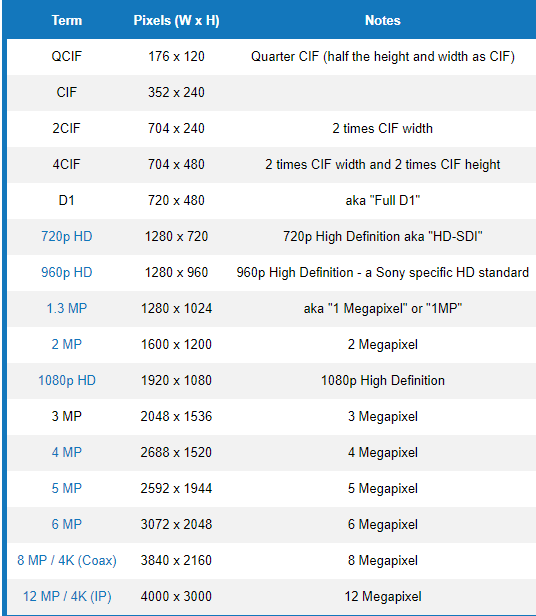

we can use this for reference [CCTV_resolution](https://optiviewusa.com/cctv-video-resolutions/)

I will group like this:
- **Below HD**: 640 x 480, 0.3MP, vga
- **HD**: 720p
- **1-2MP**: 0.9MP, 1MP, 1.3MP, 2MP
- **FHD**: 1080, Full HD Camera
- **Above FHD**: 5MP++
- **none**: -, None


In [ ]:
lsi_high = df['web_camera'][df['web_camera'].str.contains(r'5.0|5M')==1].index
df.loc[lsi_high, ['web_camera']] = df.loc[lsi_high]['web_camera'].str.replace('.+','Above FHD')

In [ ]:
lsi_belowhd = df['web_camera'][df['web_camera'].str.contains('640|0.3|vga',case=False)==1].index
df.loc[lsi_belowhd, ['web_camera']] = df.loc[lsi_belowhd]['web_camera'].str.replace('.+','Below HD')

In [ ]:
lsi_hd = df['web_camera'][df['web_camera'].str.contains(r'[^FBelow Above F]\s?HD|720|^HD')==1].index
df.loc[lsi_hd, ['web_camera']] = df.loc[lsi_hd]['web_camera'].str.replace('.+','HD')

In [ ]:
lsi_none = df['web_camera'][df['web_camera'].str.contains(r'\-|None|No')==1].index
df.loc[lsi_none, ['web_camera']] = df.loc[lsi_none]['web_camera'].str.replace('.+','none')

In [ ]:
lsi_fhd = df['web_camera'][df['web_camera'].str.contains(r'^FHD|1080|Full HD Camera')==1].index
df.loc[lsi_fhd, ['web_camera']] = df.loc[lsi_fhd]['web_camera'].str.replace('.+','FHD')

In [ ]:
lsi_mid = df['web_camera'][df['web_camera'].str.contains(r'0.9|1|1.0|1.3|2')==1].index
df.loc[lsi_mid, ['web_camera']] = df.loc[lsi_mid]['web_camera'].str.replace('.+','1-2MP')

In [ ]:
df['web_camera'].value_counts()

HD                                                                1933
Below HD                                                           209
none                                                                98
FHD                                                                 45
Above FHD                                                           27
1-2MP                                                               25
IR camera for Windows Hello                                          3
IR camera                                                            3
Full HD and 4K video with IR function to support Windows Hello       2
Name: web_camera, dtype: int64

In [ ]:
# mode imputation
df['web_camera'].fillna(df['web_camera'].value_counts().idxmax(),inplace=True)

In [ ]:
compare('web_camera')

,web_camera_clean,web_camera_raw
2182,HD,HD Camera
2104,HD,HD Camera
236,HD,HD Camera
1104,HD,HD camera with IR function to support Windows ...
748,HD,HD Camera


In [ ]:
missing(df)

,total,percent
total_usb,135,0.057496


Now we clean all missing values so let's do feature engineering for remain columns

### column: other_detail

In [ ]:
df['free_prod'] = df['other_detail'].str.replace('-','none')

In [ ]:
have_free_prod = df[df['free_prod']!='none']['free_prod'].str.replace('.+','have')
df.loc[have_free_prod.index,['free_prod']] = have_free_prod

In [ ]:
df['free_prod'].value_counts(dropna=False)

none    1501
have     847
Name: free_prod, dtype: int64

### column: prices

In [ ]:
# prices
df['prices'] = df['prices'].str.replace(',','')\
                           .str.replace('x','0')

In [ ]:
compare('prices')

,prices_clean,prices_raw
1598,10990,"10,990"
467,17990,"17,990"
96,149990,"149,990"
921,15490,"15,490"
874,37990,"37,990"


### column: model_year

In [ ]:
# model_year
df_modelyear = df['model_year'].str.extract(r'(Q\d{1}) \/ (\d{4})')
df_modelyear.columns = ['quarter', 'year']
df_modelyear.head()
df = pd.concat([df,df_modelyear], axis=1)
df.drop(['model_year'], axis=1, inplace=True)

In [ ]:
df[['quarter', 'year']].join(df_raw['model_year'].to_frame()).sample(7)

,quarter,year,model_year
251,Q2,2022,Q2 / 2022
1376,Q1,2021,Q1 / 2021
777,Q3,2021,Q3 / 2021
541,Q4,2021,Q4 / 2021
542,Q4,2021,Q4 / 2021
1485,Q1,2021,Q1 / 2021
833,Q4,2021,Q4 / 2021


### column: cpu

In [ ]:
# cpu
df['cpu'] = df['cpu'].str.strip().str.extract(r'(.*)\(')

In [ ]:
compare('cpu')

,cpu_clean,cpu_raw
2246,Intel Core i5-9300H,"Intel Core i5-9300H (2.40 GHz, 8 MB L3 Cache, ..."
1343,Intel Core i7-10750H,"Intel Core i7-10750H (2.60 GHz, 12 MB L3 Cache..."
1528,AMD Athlon Silver 3050U,AMD Athlon Silver 3050U (2.30 GHz up to 3.20 G...
2160,Intel Core i5-10210U,"Intel Core i5-10210U (1.60 GHz, 6 MB L3 Cache ..."
1836,AMD Athlon Gold 3150U,AMD Athlon Gold 3150U (2.60 GHz up to 3.30 GHz...


### column: gpu

In [ ]:
# gpu
df['gpu'] = df['gpu'].str.split('(').str[0].str.strip()

In [ ]:
compare('gpu')

,gpu_clean,gpu_raw
911,Intel Iris Xe Graphics G7,Intel Iris Xe Graphics G7
835,NVIDIA GeForce RTX 3050,NVIDIA GeForce RTX 3050 (4GB GDDR6)
47,AMD Radeon RX Vega 7,AMD Radeon RX Vega 7
2170,Intel Iris Plus Graphics G7,Intel Iris Plus Graphics G7
283,NVIDIA GeForce GTX 1650 Max-Q,NVIDIA GeForce GTX 1650 Max-Q (4GB GDDR6)


### column: size

In [ ]:
# size
df['size'] = df['size'].str.split(" ").str[0]

In [ ]:
compare('size')

,size_clean,size_raw
131,14,14 นิ้ว
1323,15.6,15.6 นิ้ว
177,14,14 นิ้ว
269,14,14 นิ้ว
689,16.2,16.2 นิ้ว


### column: resolution

In [ ]:
# resolution
df['resolution'] = df['resolution'].str.lower().str.replace(' ','').str.extract(r'(\d+[xX]+\d+)')

In [ ]:
compare('resolution')

,resolution_clean,resolution_raw
1964,1920x1080,15.6 inch (1920x1080) Full HD
1117,1920x1080,15.6 inch (1920x1080) Full HD
1599,1920x1080,15.6 inch (1920x1080) Full HD
2149,1920x1080,15.6 inch (1920x1080) Full HD
755,1920x1080,15.6 inch (1920x1080) Full HD


### column: refresh_rate

In [ ]:
df['refresh_rate'].unique().tolist()

['165 Hz',
 '144 Hz',
 '60 Hz',
 '90 Hz',
 '120 Hz',
 '360 Hz',
 '240 Hz',
 '300 Hz',
 'Hz']

this column has value just 'Hz' so that imposible that screen dont have refresh_rate right so I apply mode imputation here

In [ ]:
# refresh_rate
df['refresh_rate'] = df['refresh_rate'].str.extract(r'(\d+)')
df['refresh_rate'].fillna(df['refresh_rate'].value_counts().idxmax(), inplace=True)

In [ ]:
compare('refresh_rate')

,refresh_rate_clean,refresh_rate_raw
2027,120,120 Hz
869,144,144 Hz
1704,120,120 Hz
10,144,144 Hz
1247,60,60 Hz


### column: memory_size

In [ ]:
# memory_size
df['memory_size'] = df['memory_size'].str.replace(' ', '')\
                                    .str.replace(r'\[.*\]', '')\
                                    .str.strip()

In [ ]:
compare('memory_size')

,memory_size_clean,memory_size_raw
508,8GBDDR4,8 GB DDR4
1568,4GBDDR4OnBoard,4 GB DDR4 On Board
2026,8GBDDR4OnBoard,8 GB DDR4 On Board
297,16GBDDR5,16 GB DDR5
272,16GBDDR4,16 GB DDR4


### column: memory_slot

In [ ]:
# memory_slot
df['memory_slot'] = df['memory_slot'].str.strip().str.replace(' Slots','')

In [ ]:
compare('memory_slot')

,memory_slot_clean,memory_slot_raw
1846,1,1 Slots
2262,2,2 Slots
1544,1,1 Slots
778,2,2 Slots
1288,1,1 Slots


### column: hard_disk_drive

In [ ]:
# hard_disk_drive
df['hard_disk_drive'] = df['hard_disk_drive'].str.strip()\
                                            .str.replace(' ','')\
                                            .str.replace('HardDrive','HDD')
df['hard_disk_drive'].value_counts(dropna=False)

none                                      2164
1TB5400RPM                                 105
32GBIntelOptane                             16
128GBe.MMC                                  14
1TB7200RPM                                  13
1TBSATAHDD                                   8
64GBe.MMC                                    8
Optane32G                                    5
500GB5400RPM                                 4
32GBe.MMC                                    3
32GBOptanememory                             3
1TBHDD5400rpm2.5                             2
128GBeMCP4x                                  1
512GBPCIeNVMeM.2Class35SolidStateDrive       1
Optane16GB                                   1
Name: hard_disk_drive, dtype: int64

In [ ]:
compare('hard_disk_drive')

,hard_disk_drive_clean,hard_disk_drive_raw
1526,none,ไม่มี
1084,128GBe.MMC,128GB e.MMC
379,none,ไม่มี
1982,none,ไม่มี
1445,none,ไม่มี


### column: solid_state_drive

In [ ]:
# solid_state_drive
df['solid_state_drive'] = df['solid_state_drive'].str.strip()\
                                    .str.replace(' ','')\
                                    .str.extract(r'(^[\d.]+[\w]{2})').fillna(0)
df['solid_state_drive'].isna().sum()

0

In [ ]:
compare('solid_state_drive')

,solid_state_drive_clean,solid_state_drive_raw
2068,512GB,512 GB SSD PCIe M.2
1373,512GB,512 GB SSD PCIe M.2
1294,1TB,1TB SSD M.2 NVMe Gen 3
1235,1TB,1TB SSD PCIe M.2
1689,512GB,512 GB SSD PCIe M.2


### column: hdmi

In [ ]:
# hdmi
df['hdmi'] = df['hdmi'].str.extract(r'(\d)+').fillna(0)

In [ ]:
compare('hdmi')

,hdmi_clean,hdmi_raw
1762,1,1x HDMI
1258,1,1x HDMI
2323,1,1x HDMI
486,1,1x HDMI
218,1,1x HDMI


### column: displayport

In [ ]:
# displayport
df['displayport'] = df['displayport'].str.extract(r'(\d)+').fillna(0)
df['displayport'].value_counts(dropna=False)

0    2103
2     162
1      83
Name: displayport, dtype: int64

In [ ]:
compare('displayport')

,displayport_clean,displayport_raw
434,0,ไม่มี
1534,0,ไม่มี
360,0,ไม่มี
259,0,ไม่มี
1882,0,ไม่มี


### column: os_bundle

In [ ]:
# os_bundle
lsi_w11 = df[df['os_bundle'].str.contains('windows 11',case=False) == 1].index
lsi_w10 = df[df['os_bundle'].str.contains('windows 10',case=False) == 1].index

df.loc[lsi_w11,['os_bundle']] = df.loc[lsi_w11]['os_bundle'].str.replace(r'.+','Windows 11')
df.loc[lsi_w10,['os_bundle']] = df.loc[lsi_w10]['os_bundle'].str.replace(r'.+','Windows 10')

print(f'missing values: ', df['os_bundle'].isna().sum())
df['os_bundle'].value_counts()

missing values:  0


Windows 10              1739
Windows 11               485
DOS Operating System      58
macOS                     26
Endless OS                17
Linpus Linux               9
Ubuntu                     7
Chrome OS                  6
Android Pie                1
Name: os_bundle, dtype: int64

In [ ]:
compare('os_bundle')

,os_bundle_clean,os_bundle_raw
1578,Windows 10,Windows 10 Home (64 Bit)
2307,Windows 10,Windows 10 Home (64 Bit)
1667,Windows 10,Windows 10 Home (64 Bit)
1471,Windows 10,Windows 10 Pro 64 (64 Bit)
1719,Windows 10,Windows 10 Home (64 Bit)


### column: body_material

In [ ]:
# body_material
rep = {'Plastic':'Plastic',
       'Aluminium + Plastic':'Aluminium + Plastic',
       'Aluminum':'Aluminium',
       'Aluminum + Magnesium':'Aluminium Alloy',
       'Aluminium Alloy':'Aluminium Alloy',
       'Plastic - Covered by Alu':'Aluminium + Plastic',
       'Metallic':'Aluminium',
       'Mg Alloy':'Magnesium Alloy',
       'Magnesium Alloy':'Magnesium Alloy',
       'Magnesium Alloy + Plastic':'Magnesium Alloy',
       'Anodized aluminum':'Aluminium',
       'Carbon + Aluminum':'Aluminium Alloy',
       'Carbon Fiber + Magnesium':'Carbon Fiber',
       'Carbon Fiber':'Carbon Fiber'}
df['body_material'] = df['body_material'].map(rep)

In [ ]:
compare('body_material')

,body_material_clean,body_material_raw
2065,Aluminium,Aluminum
1476,Aluminium + Plastic,Aluminium + Plastic
1275,Aluminium,Aluminum
447,Aluminium,Aluminum
2110,Aluminium + Plastic,Aluminium + Plastic


### column: weight

In [ ]:
# weight
df['weight'] = df['weight'].str.split(' ').str[0]

In [ ]:
compare('weight')

,weight_clean,weight_raw
2177,1.19,1.19 kg
2116,2.2,2.2 kg
886,1.96,1.96 kg
659,1.75,1.75 kg
1770,2.34,2.34 kg


### column: total_usb

In [ ]:
# usb
df['usbtype_A'] = df['total_usb'].str.extract(r'(\d)+x\s?USB\s?\d\.\d\s?Type\s?[aA]|(\d+).+\d{1}\.[\d{1}][^\s]').fillna(0).astype(int).sum(axis=1)
df['usbtype_C'] = df['total_usb'].str.extract(r'(\d)+x\s?USB\s?\d\.\d\s?Type\s?[cC]').fillna(0)
df.drop(['total_usb'], axis=1, inplace=True)

In [ ]:
df[['usbtype_A', 'usbtype_C']].join(df_raw[['usb_ports','usb_ports2']])

,usbtype_A,usbtype_C,usb_ports,usb_ports2
0,3,1,3x USB 3.2 Type A,1x USB 3.2 Type C
1,3,1,3x USB 3.2 Type A,1x USB 3.2 Type C
2,3,1,3x USB 3.2 Type A,1x USB 3.2 Type C
3,3,1,3x USB 3.2 Type A,1x USB 3.2 Type C
4,3,1,3x USB 3.2 Type A,1x USB 3.2 Type C
...,...,...,...,...
2347,0,0,2x USB 3.1 Type A,NaN
2348,2,1,2x USB 3.0,1x USB 3.1 Type C
2349,2,1,2x USB 2.0,1x USB 3.1 Type C
2350,2,1,2x USB 2.0,1x USB 3.1 Type C


## Convert Data Type

In [ ]:
df.columns

Index(['names', 'prices', 'urls', 'brand', 'model', 'cpu', 'gpu', 'panel_type',
       'size', 'resolution', 'refresh_rate', 'touch_screen', 'memory_size',
       'memory_slot', 'hard_disk_drive', 'solid_state_drive', 'hdmi',
       'displayport', 'd_sub_vga', 'thunderbolt', 'wireless_lan',
       'ethernet_lan', 'bluetooth', 'os_bundle', 'web_camera', 'optical_drive',
       'fingerprint', 'body_material', 'body_color', 'weight', 'keyboard_type',
       'keyboard_backlit', 'numpad', 'other_detail', 'warranty', 'insurance',
       'm2PCIe_slot', 'm2Combo_slot', 'm2SATA_slot', 'free_prod', 'quarter',
       'year', 'usbtype_A', 'usbtype_C'],
      dtype='object')

In [ ]:
df['size'].unique()

array(['17.3', '15.6', '16', '14', '16.1', '13.3', '12.4', '11.6', '13.4',
       '14.5', '10.1', '17', '14.4', '13', '10.3', '14.2', '16.2', '15',
       '13.5', '12.3', '10.5', '13.9', '16.4'], dtype=object)

In [ ]:
df['refresh_rate'].astype(int)

0       165
1       165
2       165
3       165
4       165
       ... 
2347     60
2348     60
2349     60
2350     60
2351     60
Name: refresh_rate, Length: 2348, dtype: int64

In [ ]:
features = ['brand', 'cpu', 'gpu', 'panel_type','size', 'resolution',
       'refresh_rate', 'touch_screen', 'memory_size',
       'memory_slot', 'solid_state_drive', 'hdmi',
       'displayport', 'd_sub_vga', 'thunderbolt', 'ethernet_lan', 'bluetooth',
       'os_bundle', 'web_camera', 'optical_drive', 'fingerprint',
       'body_material', 'weight','keyboard_backlit', 'numpad','free_prod',
       'warranty', 'm2PCIe_slot', 'm2Combo_slot',
       'm2SATA_slot', 'quarter', 'year',
       'usbtype_A', 'usbtype_C']

label = ['prices']

dataset = df[features+label]

In [ ]:
dataset['solid_state_drive'].value_counts()

512GB    1508
1TB       344
256GB     323
0         113
128GB      29
2TB        28
3TB         1
4TB         1
1.5TB       1
Name: solid_state_drive, dtype: int64

In [ ]:
cols_num = ['prices','refresh_rate', 'memory_slot', 'm2PCIe_slot',
        'm2Combo_slot','m2SATA_slot', 'year','usbtype_A',
        'usbtype_C','size', 'weight']
cols_cat = ['brand', 'cpu', 'gpu', 'panel_type', 'resolution', 'touch_screen',
        'memory_size', 'solid_state_drive', 'hdmi',
        'displayport', 'd_sub_vga', 'thunderbolt', 'ethernet_lan', 'bluetooth',
        'os_bundle', 'web_camera', 'optical_drive', 'fingerprint',
        'body_material','keyboard_backlit', 'numpad','free_prod',
        'warranty', 'quarter' ]

In [ ]:
for col_num in cols_num:
    dataset[col_num] = dataset[col_num].apply(pd.to_numeric, errors='coerce')
for col_cat in cols_cat:
    dataset[col_cat] = dataset[col_cat].astype('category')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2348 entries, 0 to 2351
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   brand              2348 non-null   category
 1   cpu                2348 non-null   category
 2   gpu                2348 non-null   category
 3   panel_type         2348 non-null   category
 4   size               2348 non-null   float64 
 5   resolution         2348 non-null   category
 6   refresh_rate       2348 non-null   int64   
 7   touch_screen       2348 non-null   category
 8   memory_size        2348 non-null   category
 9   memory_slot        2348 non-null   int64   
 10  solid_state_drive  2348 non-null   category
 11  hdmi               2348 non-null   category
 12  displayport        2348 non-null   category
 13  d_sub_vga          2348 non-null   category
 14  thunderbolt        2348 non-null   category
 15  ethernet_lan       2348 non-null   category
 16  blueto

In [ ]:
dataset.head()

,brand,cpu,gpu,panel_type,size,resolution,refresh_rate,touch_screen,memory_size,memory_slot,...,free_prod,warranty,m2PCIe_slot,m2Combo_slot,m2SATA_slot,quarter,year,usbtype_A,usbtype_C,prices
0,Acer,Intel Core i7-12700H,NVIDIA GeForce RTX 3060,IPS,17.3,2560x1440,165,none,32GBDDR5,2,...,none,3,2,0,0,Q3,2022,3,1,79900
1,Acer,Intel Core i7-12700H,NVIDIA GeForce RTX 3060,IPS,17.3,2560x1440,165,none,16GBDDR5,2,...,none,3,2,0,0,Q3,2022,3,1,66900
2,Acer,Intel Core i7-12700H,NVIDIA GeForce RTX 3050 Ti,IPS,15.6,1920x1080,165,none,8GBDDR4,2,...,none,3,2,0,0,Q3,2022,3,1,41990
3,Acer,Intel Core i5-12500H,NVIDIA GeForce RTX 3050 Ti,IPS,15.6,1920x1080,165,none,8GBDDR4,2,...,none,3,2,0,0,Q3,2022,3,1,37990
4,Acer,AMD Ryzen 5 6600H,NVIDIA GeForce RTX 3050 Ti,IPS,15.6,1920x1080,165,none,8GBDDR5,2,...,none,3,2,0,0,Q3,2022,3,1,37990


## Correlation Matrix

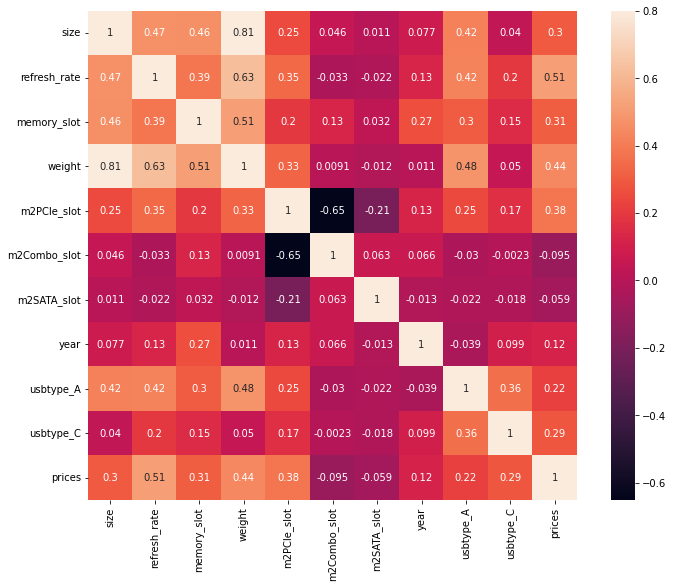

In [ ]:
import seaborn as sns
#correlation matrix
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,
			vmax=.8,
			square=True,
            annot=True);